In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### loading dependencies

In [2]:
from fastai import *
from fastai.vision import *

### getting data

In [3]:
path = untar_data(URLs.PETS)
path

PosixPath('/storage/data/oxford-iiit-pet')

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
doc(untar_data)

In [6]:
path.ls()

[PosixPath('/storage/data/oxford-iiit-pet/images'),
 PosixPath('/storage/data/oxford-iiit-pet/annotations')]

In [7]:
path_anno = path/'annotations'

In [8]:
path_img = path/'images'

In [9]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/storage/data/oxford-iiit-pet/images/american_bulldog_146.jpg'),
 PosixPath('/storage/data/oxford-iiit-pet/images/japanese_chin_12.jpg'),
 PosixPath('/storage/data/oxford-iiit-pet/images/Sphynx_247.jpg'),
 PosixPath('/storage/data/oxford-iiit-pet/images/beagle_158.jpg'),
 PosixPath('/storage/data/oxford-iiit-pet/images/beagle_76.jpg')]

### extracting labels from file names and normalizing it

In [10]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

data objecting holding both training and validation set at same time

In [11]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224,bs=64)

In [12]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_bulldog,japanese_chin,Sphynx,shiba_inu,Siamese
Path: /storage/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,american_bulldog,Persian,Bombay,havanese
Path: /storage/data/oxford-iiit-pet/images;

Test: None

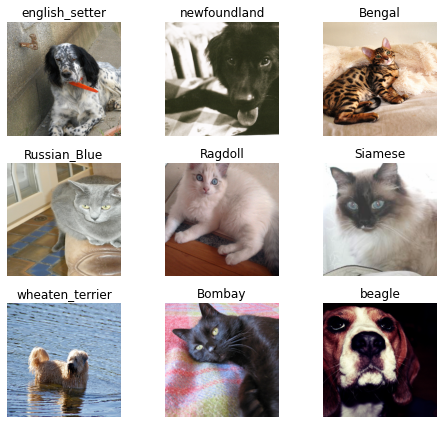

In [13]:
data.show_batch(rows=3,figsize=(7,6))

In [14]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

### loading Resnet34 model fiting it

In [15]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate,model_dir="/tmp/model/")

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.337093,0.342866,0.109608,00:26
1,0.608104,0.274389,0.084574,00:24
2,0.382651,0.218813,0.077808,00:23
3,0.274273,0.205505,0.070365,00:24


In [17]:
learn.save('stage-1',return_path=True)

PosixPath('/tmp/model/stage-1.pth')

In [18]:
doc(learn.save)

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

displaying top losses

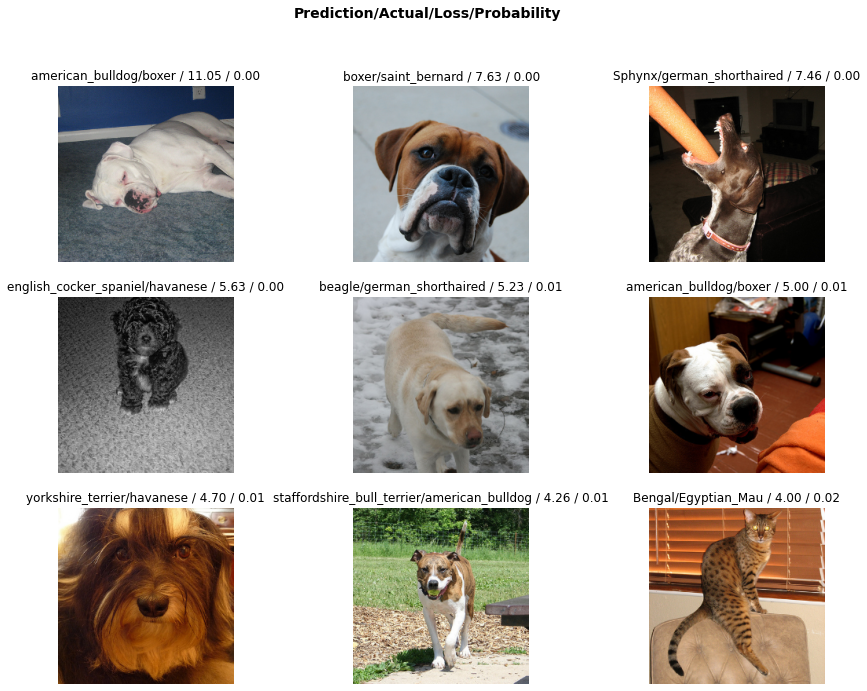

In [20]:
interp.plot_top_losses(9,figsize=(15,11))

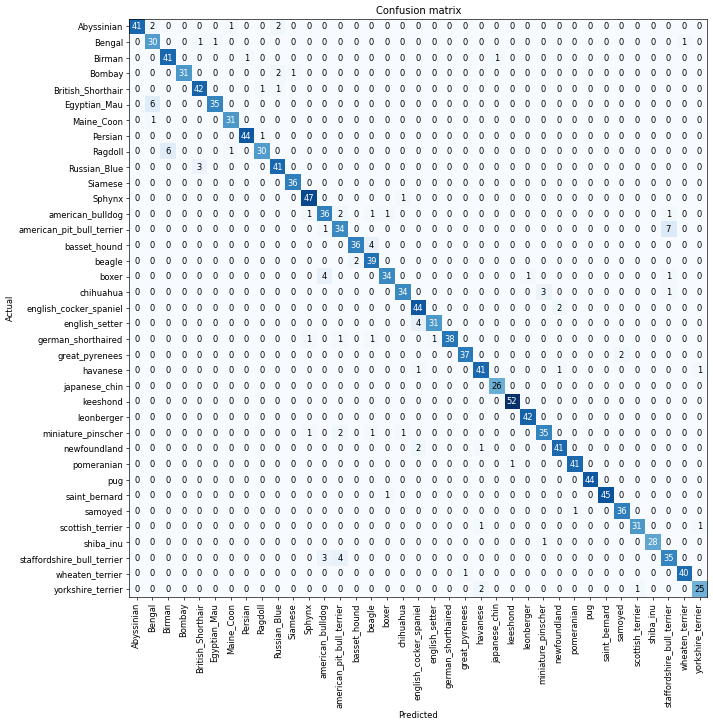

In [21]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

seeing obeservations where models making most mistakes

In [22]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Egyptian_Mau', 'Bengal', 6),
 ('Ragdoll', 'Birman', 6),
 ('basset_hound', 'beagle', 4),
 ('boxer', 'american_bulldog', 4),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Bombay', 'Russian_Blue', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('english_cocker_spaniel', 'newfoundland', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('newfoundland', 'english_cocker_spaniel', 2),
 ('yorkshire_terrier', 'havanese', 2)]

unfreezing the earlier layers training the models

In [23]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.750954,0.343869,0.110961,00:27


finding best learning rate

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


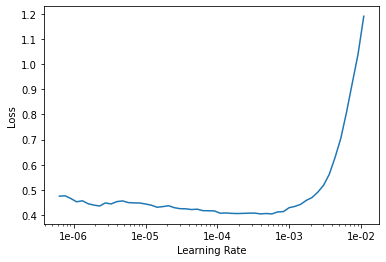

In [24]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(4,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.320984,0.255799,0.081867,00:28
1,0.272376,0.237319,0.075778,00:28
2,0.250116,0.226642,0.069012,00:27
3,0.232728,0.225707,0.070365,00:28


In [29]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=320,bs=32)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
american_bulldog,japanese_chin,Sphynx,beagle,shiba_inu
Path: /storage/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
pomeranian,havanese,Sphynx,Bombay,pug
Path: /storage/data/oxford-iiit-pet/images;

Test: None

### loading ResNet50 model

In [30]:
learn = cnn_learner(data,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


fitting the model

In [31]:
learn.fit_one_cycle(8,max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.151211,0.315167,0.100135,01:20
1,0.520559,0.245220,0.085927,01:12
2,0.382492,0.217740,0.063599,01:12
3,0.285877,0.189156,0.059540,01:12
4,0.225483,0.167998,0.050744,01:12
5,0.180343,0.161485,0.048038,01:12
6,0.124586,0.159715,0.050068,01:12
7,0.125811,0.156817,0.048038,01:12


In [32]:
interp = ClassificationInterpretation.from_learner(learn)

showing the observations where model makes most mistakes

In [33]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 6),
 ('Bengal', 'Egyptian_Mau', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('boxer', 'american_bulldog', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('keeshond', 'leonberger', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Bengal', 'Abyssinian', 2),
 ('British_Shorthair', 'Bombay', 2),
 ('Ragdoll', 'Birman', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('beagle', 'basset_hound', 2),
 ('beagle', 'german_shorthaired', 2),
 ('english_cocker_spaniel', 'english_setter', 2)]